<a href="https://colab.research.google.com/github/viktoriahard/ds/blob/main/DS2_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!kaggle  download -c body-fat-prediction-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [9]:
df = pd.read_csv('/content/sample_data/bodyfat.csv')
print(df.head())
print(df.info())
print(df.describe())



   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      25

In [4]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


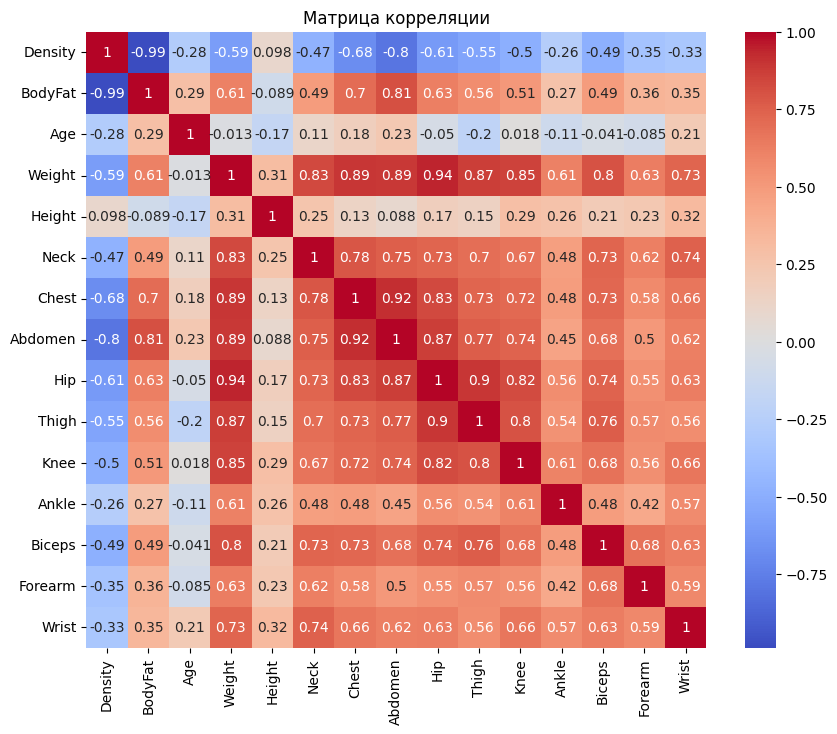

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

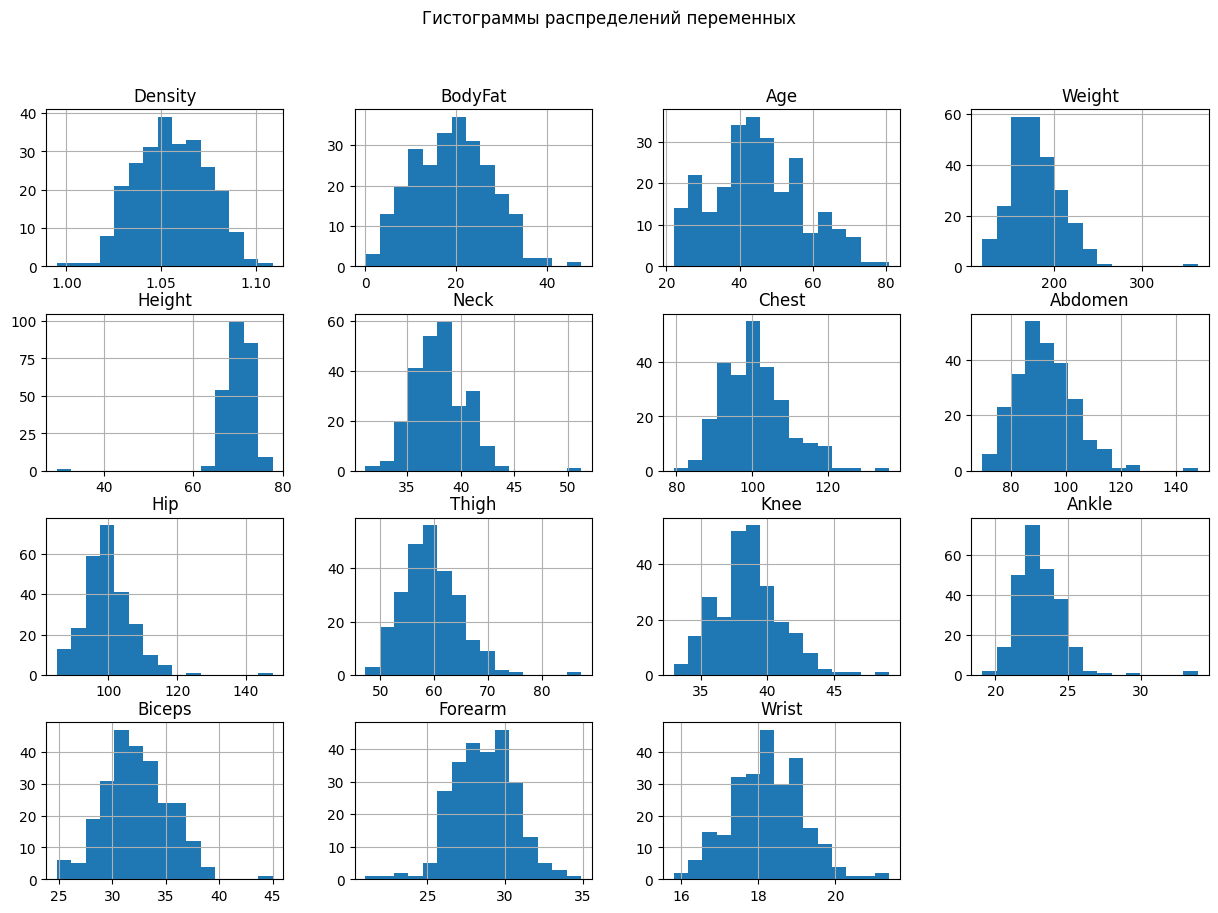

In [6]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Гистограммы распределений переменных')
plt.show()

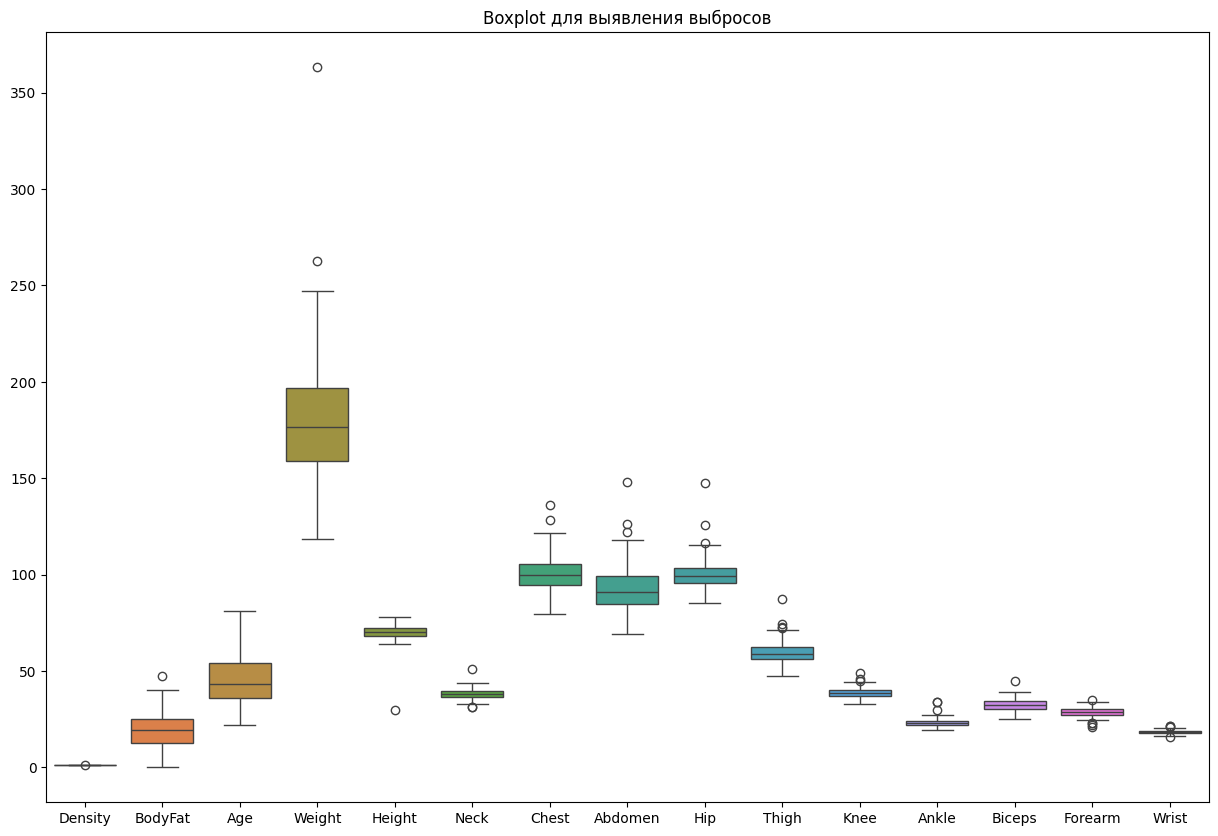

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot для выявления выбросов')
plt.show()

Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6}
MAE: 3.872281594369926
MSE: 21.895971182656996
R²: 0.5293018133528591


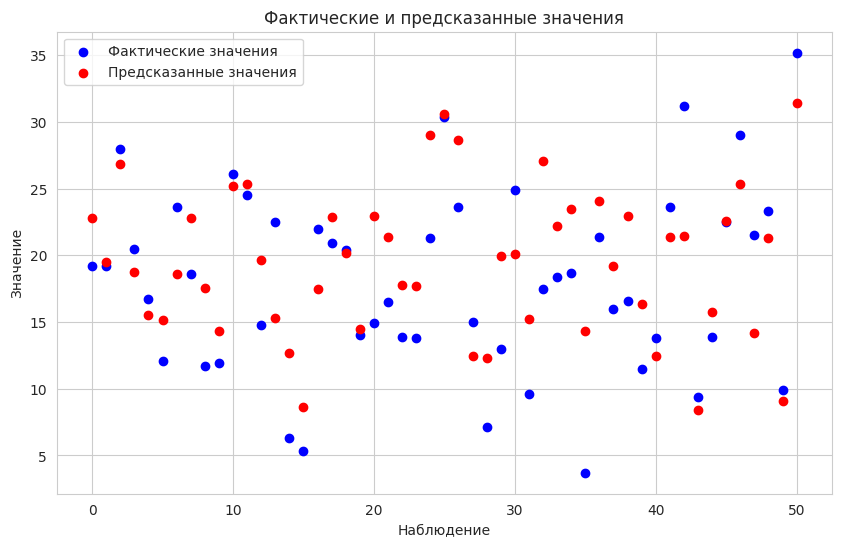

In [68]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['BodyFat', 'Density', 'Abdomen'])
y = df['BodyFat']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = XGBRegressor()

# Определение параметров для подбора
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Использование лучших параметров для обучения модели
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Метрики качества модели Random Forest Regressor:
MAE: 4.0227
MSE: 23.8266
RMSE: 4.8813
R²: 0.4878


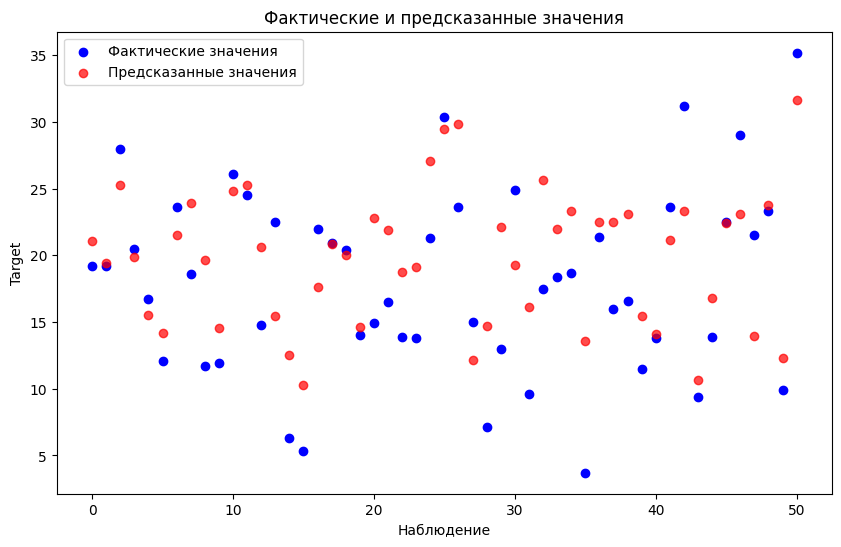

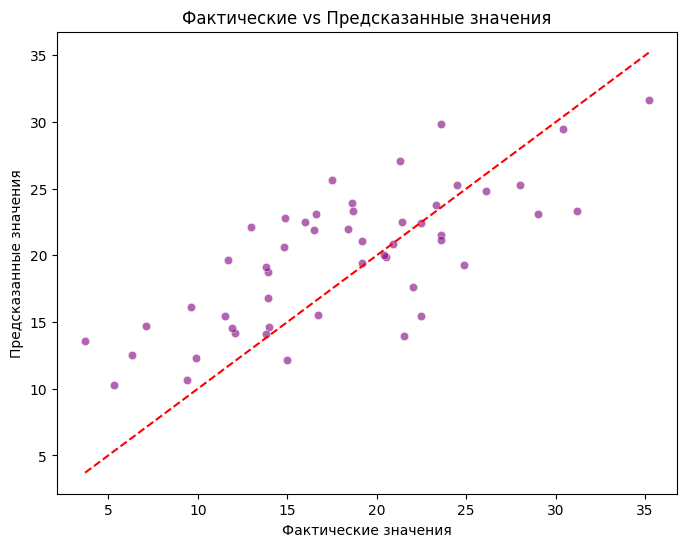

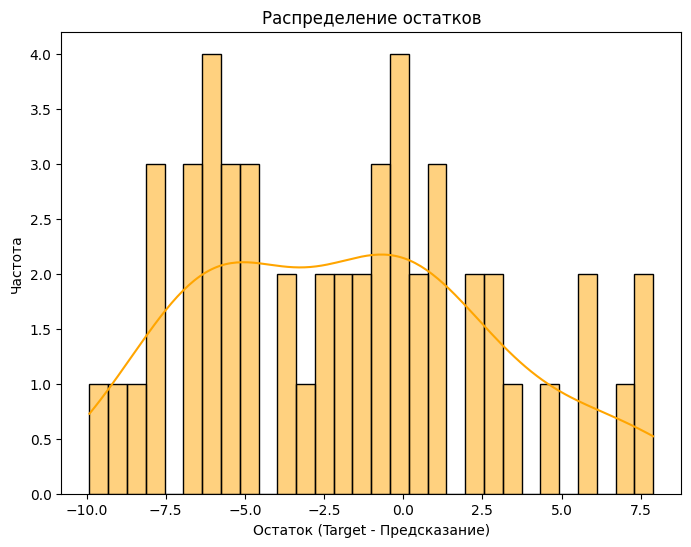

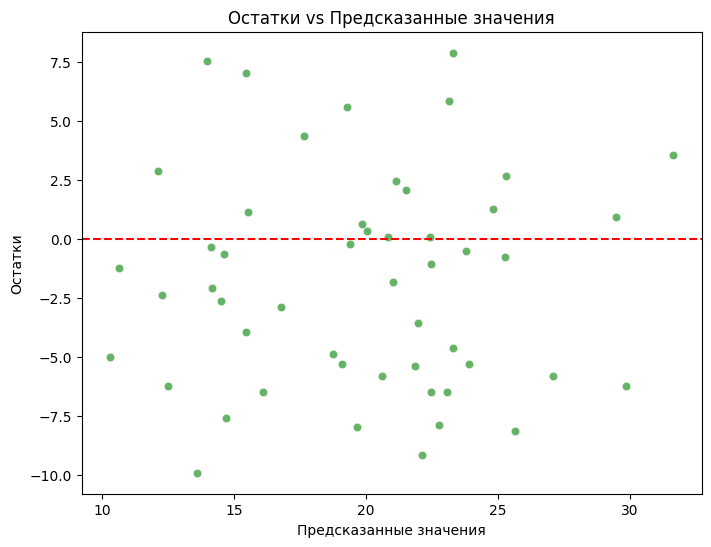

/tmp/ipython-input-384/2679224031.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


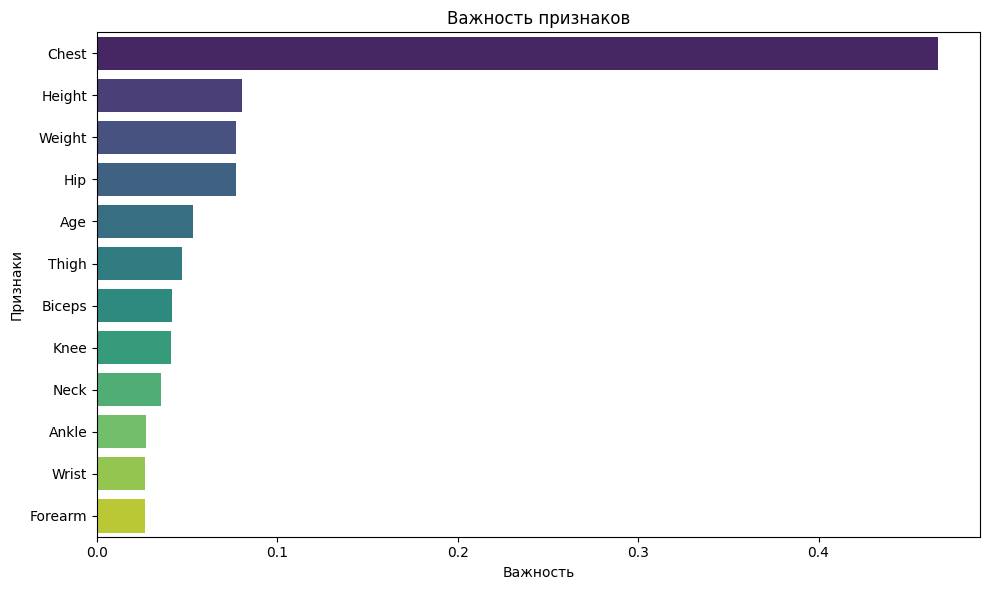

In [30]:
#Random Forest R

rfr = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rfr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = rfr.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'Метрики качества модели Random Forest Regressor:')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')


# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Диаграмма предсказанных vs фактических значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

# График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

# Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()


feature_names = X.columns.tolist()

importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

In [32]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 8.6 MB/s eta 0:00:00


Mean Squared Error (MSE): 22.11
R-squared (R^2): 0.52


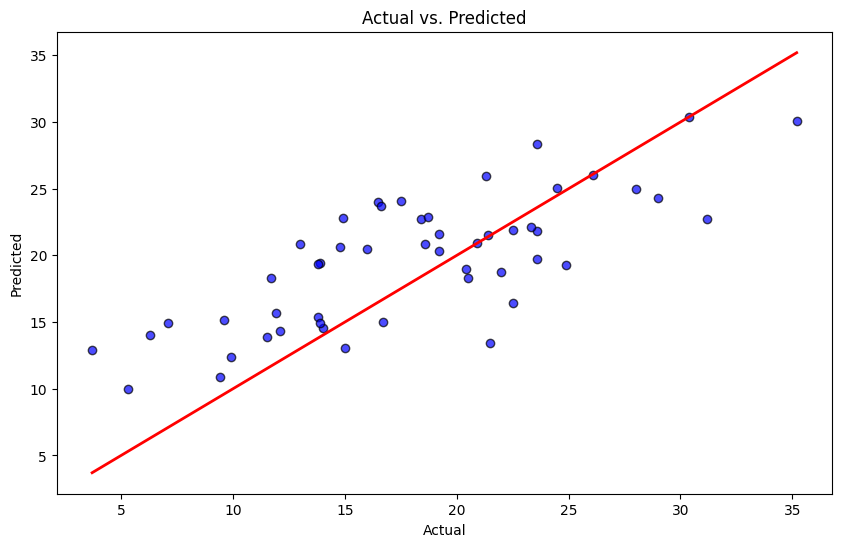

In [35]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0)
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

Mean Squared Error (MSE): 25.9106868452551922
R-squared (R^2): 0.4429973801525805


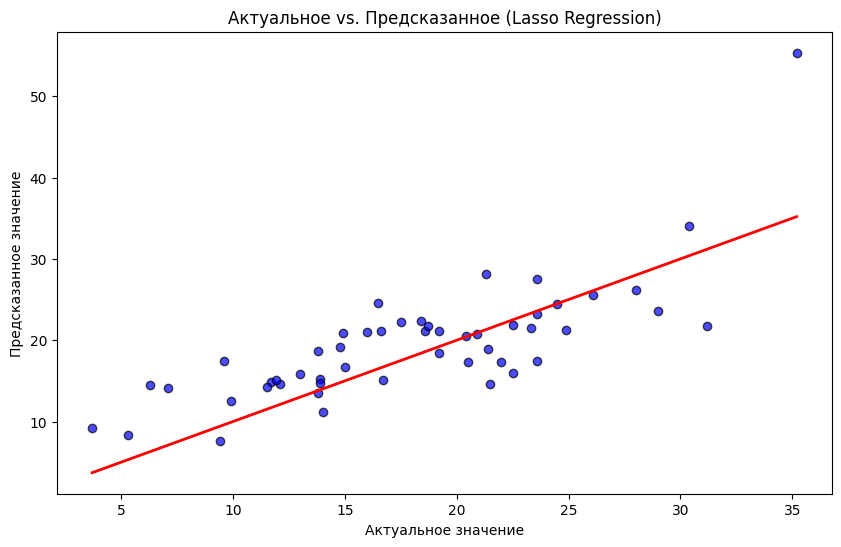

In [37]:
from sklearn.linear_model import Lasso

regressor = Lasso(alpha=0.1)  # Здесь alpha - гиперпараметр регуляризации L1
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.16f}")
print(f"R-squared (R^2): {r2:.16f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Актуальное значение")
plt.ylabel("Предсказанное значение")
plt.title("Актуальное vs. Предсказанное (Lasso Regression)")
plt.show()

ElasticNet - Средняя абсолютная ошибка (MAE): 3.94
ElasticNet - Среднеквадратичная ошибка (MSE): 26.68
ElasticNet - Коэффициент детерминации (R²): 0.43


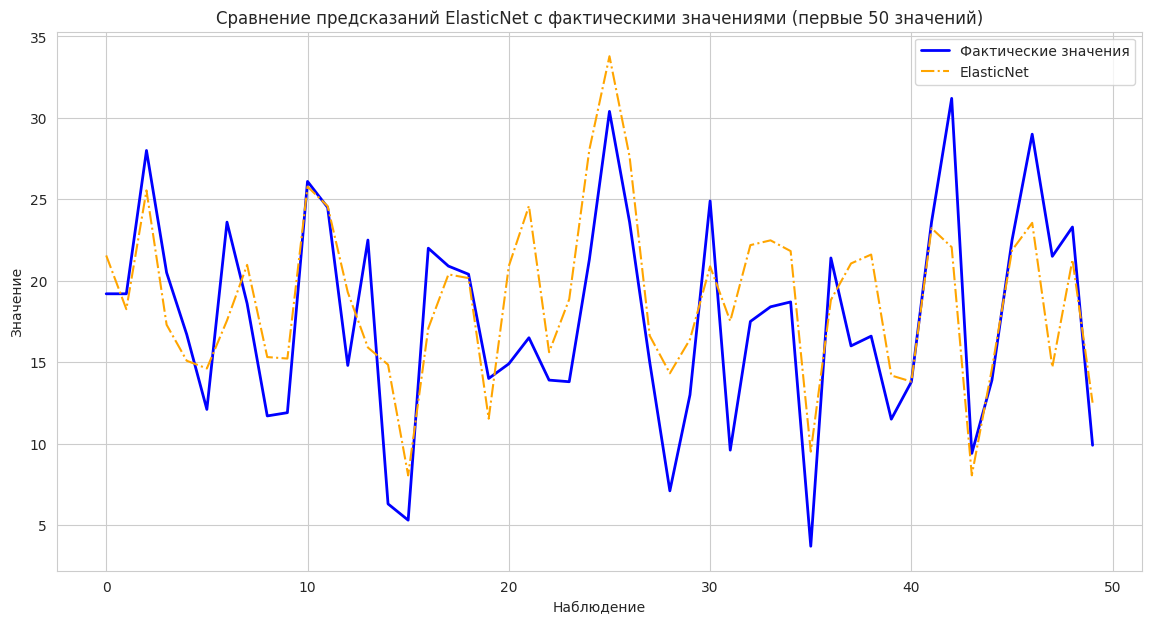

In [40]:
from sklearn.linear_model import ElasticNet

# Создаем модель ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Обучаем модель ElasticNet
elastic_net.fit(X_train, y_train)

# Делаем прогнозы на тестовом наборе
y_pred_en = elastic_net.predict(X_test)

# Вычисление метрик для ElasticNet
mae_en = mean_absolute_error(y_test, y_pred_en)
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

print(f"ElasticNet - Средняя абсолютная ошибка (MAE): {mae_en:.2f}")
print(f"ElasticNet - Среднеквадратичная ошибка (MSE): {mse_en:.2f}")
print(f"ElasticNet - Коэффициент детерминации (R²): {r2_en:.2f}")

# Визуализируем предсказания ElasticNet и фактические значения (первые 50 значений)
plt.figure(figsize=(14, 7))
plt.plot(range(50), y_test.iloc[:50], label='Фактические значения', color='blue', linewidth=2)
plt.plot(range(50), y_pred_en[:50], label='ElasticNet', color='orange', linestyle='-.')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний ElasticNet с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()

In [70]:
models = {
    'XGBRegressor': XGBRegressor(colsample_bytree=0.6, learning_rate=0.05, max_depth=2, n_estimators=200, subsample=0.6),
    'Catboost' : CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0),
    'Elasticnet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'Lasso': Lasso(alpha=0.1) ,
    'RandomForest': RandomForestRegressor(random_state=42)}

best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    best_models[name] = model

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance on Test Set:")
    print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}\n")


best_model_name = max(best_models, key=lambda name: r2_score(y_test, best_models[name].predict(X_test)))
best_model = best_models[best_model_name]
print(f"Best model {best_model_name}")

Training XGBRegressor...
Training Catboost...
Training Elasticnet...
Training Lasso...
Training RandomForest...
XGBRegressor Performance on Test Set:
MAE: 3.872, RMSE: 4.679, R2: 0.529

Catboost Performance on Test Set:
MAE: 3.900, RMSE: 4.702, R2: 0.525

Elasticnet Performance on Test Set:
MAE: 3.944, RMSE: 5.166, R2: 0.426

Lasso Performance on Test Set:
MAE: 3.871, RMSE: 5.090, R2: 0.443

RandomForest Performance on Test Set:
MAE: 4.023, RMSE: 4.881, R2: 0.488

Best model XGBRegressor


In [86]:
sample_data = pd.DataFrame({

    'Age': [30],
    'Weight': [70],
    'Height': [175],
    'Neck': [40],
    'Chest': [95],
    'Hip': [90],
    'Thigh': [55],
    'Knee': [37],
    'Ankle': [22],
    'Biceps': [35],
    'Forearm': [28],
    'Wrist': [18]
})

# Predicting body fat
predicted_bodyfat = best_model.predict(sample_data)
print(f"Predicted Body Fat Percentage for sample data: {predicted_bodyfat[0]:.2f}%")

Predicted Body Fat Percentage for sample data: 29.34%
